In [1]:
#Task 1

In [158]:
import pandas as pd
import numpy as np

In [159]:
data=pd.read_csv("liver_disorder_data.txt")
data.columns=[ 'mcv'
   ,'alkphos'
   ,'sgpt'
   ,'sgot'
   ,'gammagt'
   ,'drinks'
   ,'selector']
df2=data
data.describe()


,selector
count,344.000000
mean,1.581395
std,0.494049
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [160]:
df2=data
df2

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,64,59,32,23,0.0,2
1,86,54,33,16,54,0.0,2
2,91,78,34,24,36,0.0,2
3,87,70,?,28,10,0.0,2
4,98,55,13,17,17,0.0,2
...,...,...,...,...,...,...,...
339,99,75,26,24,41,12.0,1
340,96,69,53,43,203,12.0,2
341,98,77,55,35,89,15.0,1
342,91,68,27,26,14,16.0,1


In [161]:
#KNN implementation
from collections import Counter
def euclidian_distance(a,b):
    half=np.sum(a-b)**2
    return (np.sqrt(half))

class KNN():

    X_train=0
    Y_train=0
    test_size=45
    k=0
    def __init__(self, k, scalefeatures=False):        
        self.k=k
    def fit(self,x,y):
        self.X_train=x
        self.Y_train=y
        
    
    def Compute_distances(self,X):
        dists=[euclidian_distance(X,x1) for x1 in self.X_train]
        dists2= np.argsort(dists)[:self.k]
        dist3=[self.Y_train[i] for i in dists2]
        dist4= Counter(dist3).most_common(1)
        return dist4[0][0]
    
    def predict(self,X):
        pclass = [self.Compute_distances(x) for x in X ]
        return np.array(pclass)

In [162]:
# Build a 3-nearest neighbour classifier...
c1=KNN(13)
c1.fit(Xtrain,Ytrain)
predictions = c1.predict(Xtest)
predictions

array([2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1], dtype=int64)

In [163]:
#Check the accuracy on the test set..
accuracy = np.sum(predictions == Ytest)/len(Ytest)
accuracy=accuracy*100
print(accuracy,"%")

55.33980582524271 %


In [164]:
#Replacing ? to NaN

In [165]:
df2['mcv'] = df2['mcv'].str.replace('?', '')
df2['alkphos'] = df2['alkphos'].str.replace('?', '')
df2['sgpt'] = df2['sgpt'].str.replace('?', '')
df2['sgot'] = df2['sgot'].str.replace('?', '')
df2['gammagt'] = df2['gammagt'].str.replace('?', '')
df2['drinks'] = df2['drinks'].str.replace('?', '')

In [166]:
#Converting data to numeric

In [167]:
df2=df2.apply(pd.to_numeric)
Y=df2.iloc[:, 6].values
X=df2.iloc[ : , df2.columns != 'selector'].values

In [168]:
df2['mcv'] = df2['mcv'].fillna(df2['mcv'].median())
df2['alkphos'] = df2['alkphos'].fillna(df2['alkphos'].median())
df2['sgpt'] = df2['sgpt'].fillna(df2['sgpt'].median())
df2['sgot'] = df2['sgot'].fillna(df2['sgot'].median())
df2['gammagt'] = df2['gammagt'].fillna(df2['gammagt'].median())
df2['drinks'] = df2['drinks'].fillna(df2['drinks'].median())


In [169]:
# Adding missing values

In [170]:
#Giving values to X and Y 
Y=df2.iloc[:, 6].values
X=df2.iloc[ : , df2.columns != 'selector'].values
df2.describe()
Y
X

array([[85., 64., 59., 32., 23.,  0.],
       [86., 54., 33., 16., 54.,  0.],
       [91., 78., 34., 24., 36.,  0.],
       ...,
       [98., 77., 55., 35., 89., 15.],
       [91., 68., 27., 26., 14., 16.],
       [98., 99., 57., 45., 65., 20.]])

In [171]:
df2.isnull().sum()
df2.isna().sum()

mcv         0
alkphos     0
sgpt        0
sgot        0
gammagt     0
drinks      0
selector    0
dtype: int64

In [172]:
df2.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,90.218023,69.892442,30.343023,24.459302,38.340116,3.447674,1.581395
std,4.418569,18.293606,19.444735,9.913096,39.283254,3.331998,0.494049
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.750000,57.000000,20.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,22.500000,24.500000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.250000,5.250000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [173]:
#Normalization of data
from sklearn import preprocessing
x = X
min_max_scaler = preprocessing.MinMaxScaler()
print(x)
x_scaled = min_max_scaler.fit_transform(x)
d2 = pd.DataFrame(x_scaled,columns=['mcv', 'alkphos', 'sgpt','sgot', 'gammagt', 'drinks'])
X=d2.values
d2.describe().T

[[85. 64. 59. 32. 23.  0.]
 [86. 54. 33. 16. 54.  0.]
 [91. 78. 34. 24. 36.  0.]
 ...
 [98. 77. 55. 35. 89. 15.]
 [91. 68. 27. 26. 14. 16.]
 [98. 99. 57. 45. 65. 20.]]


,count,mean,std,min,25%,50%,75%,max
mcv,344.0,0.663632,0.116278,0.0,0.598684,0.657895,0.736842,1.0
alkphos,344.0,0.407760,0.159075,0.0,0.295652,0.382609,0.495652,1.0
sgpt,344.0,0.174457,0.128773,0.0,0.105960,0.145695,0.198675,1.0
sgot,344.0,0.252718,0.128742,0.0,0.181818,0.227273,0.285714,1.0
gammagt,344.0,0.114178,0.134532,0.0,0.034247,0.066781,0.141267,1.0
drinks,344.0,0.172384,0.166600,0.0,0.025000,0.150000,0.262500,1.0


In [174]:
#Now features selection

In [175]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

In [176]:
print(X)
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features)

[[0.526 0.357 0.364 0.351 0.062 0.   ]
 [0.553 0.27  0.192 0.143 0.168 0.   ]
 [0.684 0.478 0.199 0.247 0.106 0.   ]
 ...
 [0.868 0.47  0.338 0.39  0.288 0.75 ]
 [0.684 0.391 0.152 0.273 0.031 0.8  ]
 [0.868 0.661 0.351 0.519 0.205 1.   ]]
[0.054 0.174 0.034 0.479 1.145 0.05 ]
[[0.526 0.357 0.351 0.062]
 [0.553 0.27  0.143 0.168]
 [0.684 0.478 0.247 0.106]
 ...
 [0.868 0.47  0.39  0.288]
 [0.684 0.391 0.273 0.031]
 [0.868 0.661 0.519 0.205]]


In [177]:
#discreatization
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder

X = X.astype('float32')
y = LabelEncoder().fit_transform(Y.astype('str'))

In [178]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(X)
data
data_fordiscreat1=pd.DataFrame(data,columns=['mcv', 'alkphos', 'sgpt','sgot', 'gammagt', 'drinks'])
data_fordiscreat1

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,3.0,3.0,3.0,3.0,0.0,0.0
1,4.0,2.0,2.0,0.0,2.0,0.0
2,5.0,4.0,2.0,2.0,1.0,0.0
3,4.0,4.0,1.0,3.0,0.0,0.0
4,8.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
339,8.0,4.0,1.0,2.0,1.0,7.0
340,7.0,3.0,3.0,4.0,7.0,7.0
341,8.0,4.0,3.0,3.0,3.0,8.0
342,5.0,3.0,1.0,2.0,0.0,8.0


In [179]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='uniform')
X = X.astype('float64')
X= trans.fit_transform(X)
data_fordiscreat2=pd.DataFrame(data,columns=['mcv', 'alkphos', 'sgpt','sgot', 'gammagt', 'drinks'])

X=data_fordiscreat2.values
data_fordiscreat2.shape

(344, 6)

In [180]:
#selecting features
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data_fordiscreat2.iloc[:,0:6]  #independent columns
Y=df2.iloc[:,6]  #target column i.e price range#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 10 best features

     Specs      Score
4  gammagt  19.382828
3     sgot   9.361731
1  alkphos   3.018588
2     sgpt   1.525807
0      mcv   1.100069
5   drinks   0.586098


In [181]:
#selceting features
X2=pd.DataFrame(data_fordiscreat2[["gammagt"
    ,"sgot"
    ,"alkphos"
    ,"sgpt",
    "mcv"
   ]])

In [182]:
X=X2.values
Y=df2.iloc[:,6].values


In [183]:
# Spllit Data into train and test
import Split as t 
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)
print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape)   
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)

 Training Data Set Dimensions= (241, 5) Training True Class labels dimensions (241,)
 Test Data Set Dimensions= (103, 5) Test True Class labels dimensions (241,)


In [184]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(Xtrain, Ytrain) 
  
# making predictions on the testing set 
y_pred = gnb.predict(Xtest) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Ytest, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 55.33980582524271


In [141]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(Xtrain,Ytrain)
    
    train_scores.append(knn.score(Xtrain,Ytrain))
    test_scores.append(knn.score(Xtest,Ytest))

In [142]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 95.850622406639 % and k = [1]


In [143]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.69902912621359 % and k = [14]


In [144]:
knn = KNeighborsClassifier(9)

knn.fit(Xtrain,Ytrain)
knn.score(Xtest,Ytest)

0.6990291262135923

In [185]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(Xtest)
confusion_matrix(Ytest,y_pred)
pd.crosstab(Ytest, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,All
True,,,
1,22,21,43
2,11,49,60
All,33,70,103


Text(0.5, 12.5, 'Predicted label')

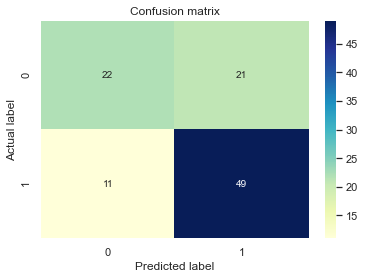

In [186]:
from sklearn.model_selection import KFold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

y_pred = knn.predict(Xtest)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Ytest, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
# Kfold cross-validation
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for train_ix, test_ix in kfold.split(X, Y):
    
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=115, 1=160, Test: 0=29, 1=40
>Train: 0=115, 1=160, Test: 0=29, 1=40
>Train: 0=115, 1=160, Test: 0=29, 1=40
>Train: 0=115, 1=160, Test: 0=29, 1=40
>Train: 0=116, 1=160, Test: 0=28, 1=40
